#### Start by importing packages and setting the working directory

In [1]:
#get occurrence data for set of species
from shapely.affinity import scale
from shapely.geometry import Point
from shapely.ops import transform
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd
from pygbif.species import name_backbone
from pygbif import occurrences as occ
import urllib3
import requests
import zipfile
import io

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

file_dir=r'C:/Users/M-RAM/PycharmProjects/InternshipNaturalis/github_trait_geo_diverse_dl/trait-geo-diverse-dl'


Can't load requested DLL: C:\Program Files (x86)\GDAL\gdalplugins\gdal_BAG.dll
193: %1 is not a valid Win32 application.

Can't load requested DLL: C:\Program Files (x86)\GDAL\gdalplugins\gdal_BAG.dll
193: %1 is not a valid Win32 application.

Can't load requested DLL: C:\Program Files (x86)\GDAL\gdalplugins\gdal_FITS.dll
193: %1 is not a valid Win32 application.

Can't load requested DLL: C:\Program Files (x86)\GDAL\gdalplugins\gdal_FITS.dll
193: %1 is not a valid Win32 application.

Can't load requested DLL: C:\Program Files (x86)\GDAL\gdalplugins\gdal_GMT.dll
193: %1 is not a valid Win32 application.

Can't load requested DLL: C:\Program Files (x86)\GDAL\gdalplugins\gdal_GMT.dll
193: %1 is not a valid Win32 application.

Can't load requested DLL: C:\Program Files (x86)\GDAL\gdalplugins\gdal_HDF4.dll
193: %1 is not a valid Win32 application.

Can't load requested DLL: C:\Program Files (x86)\GDAL\gdalplugins\gdal_HDF4.dll
193: %1 is not a valid Win32 application.

Can't load requested

#### Get backbone taxonomy code for each species

In [2]:
#Create the dataframes to be concatenated and filtered
occ_all_species = pd.read_csv(file_dir+"/data/SQL_raw_gbif/occurrences_all_species.csv")
df = occ_all_species[occ_all_species['label'].str.contains(" ")]

print("oc_all_species n.rows: ",len(occ_all_species.index))
print("df n.rows: ",len(occ_all_species.index))

#Get unique label names
labels=df["label"].tolist()
unique_labels=df["label"].unique()

names = []
back_key =[]

#Get backbone associated species names and taxon keys
for item in unique_labels:
    i = name_backbone(item)['species']
    j = name_backbone(item)['usageKey']
    print(item,j,i)
    names.append(i)
    back_key.append(j)
    

C:\Users\M-RAM\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


oc_all_species n.rows:  834182
df n.rows:  834182
Odocoileus virginianus 2440965 Odocoileus virginianus
Alces alces 2440940 Alces alces
Capreolus capreolus 5220126 Capreolus capreolus
Cervus elaphus 2440958 Cervus elaphus
Rangifer tarandus 5220114 Rangifer tarandus
Ovibos moschatus 2441108 Ovibos moschatus
Rangifer tarandus tarandus 7194050 Rangifer tarandus
Rangifer tarandus platyrhynchus 5706312 Rangifer tarandus
Dama dama 5220136 Dama dama
Sus scrofa 7705930 Sus scrofa
Raphicerus campestris 2441141 Raphicerus campestris
Odocoileus hemionus columbianus 4262326 Odocoileus hemionus
Odocoileus hemionus californicus 4262298 Odocoileus hemionus
Ovis canadensis nelsoni 4262556 Ovis canadensis
Cervus elaphus nannodes 4262374 Cervus elaphus
Ovis canadensis californiana 4262555 Ovis canadensis
Ovis canadensis auduboni 9124013 Ovis canadensis
Odocoileus hemionus hemionus 7059490 Odocoileus hemionus
Alces alces andersoni 8741919 Alces americanus
Cervus elaphus canadensis 4262380 Cervus elaphus


Redunca arundinum 2441037 Redunca arundinum
Pecari tajacu torvus 4262864 Pecari tajacu
Odocoileus virginianus goudotii 4262334 Odocoileus virginianus
Raphicerus sharpei 2441140 Raphicerus sharpei
Cephalophus rufilatus 2441161 Cephalophus rufilatus
Pecari tajacu bangsi 4262856 Pecari tajacu
Cephalophus dorsalis dorsalis 4262458 Cephalophus dorsalis
Cephalophus brookei 4262456 Cephalophus brookei
Neotragus batesi 2441072 Neotragus batesi
Pecari tajacu patira 4262854 Pecari tajacu
Ourebia ourebi quadriscopa 4262448 Ourebia ourebi
Odocoileus hemionus fuliginatus 4262315 Odocoileus hemionus
Cephalophus nigrifrons 2441154 Cephalophus nigrifrons
Gazella gazella 5220154 Gazella gazella
Connochaetes taurinus mearnsi 4262643 Connochaetes taurinus
Connochaetes taurinus johnstoni 4262645 Connochaetes taurinus
Potamochoerus larvatus 2441226 Potamochoerus larvatus
Ovis gmelini 9542814 Ovis gmelini
Parablastomeryx floridanus 4970796 Blastomeryx floridanus
Paratylopus labiatus 5936134 Poebrotherium la

Agriochoerus antiquus 4971602 Agriochoerus antiquus
Philantomba maxwellii 7261459 Philantomba maxwellii
Budorcas taxicolor 2441046 Budorcas taxicolor
Antidorcas marsupialis marsupialis 7261433 Antidorcas marsupialis
Camelus bactrianus 2441238 Camelus bactrianus
Cervus nippon yesoensis 4262373 Cervus nippon
Hippocamelus bisulcus 2440981 Hippocamelus bisulcus
Sylvicapra grimmia caffra 4262658 Sylvicapra grimmia
Procapra gutturosa 2441147 Procapra gutturosa
Sylvicapra grimmia grimmia 7261437 Sylvicapra grimmia
Odocoileus virginianus peruvianus 4262318 Odocoileus virginianus
Tragelaphus scriptus ornatus 5706347 Tragelaphus scriptus
Raphicerus campestris campestris 7261435 Raphicerus campestris
Syncerus caffer nanus 4262529 Syncerus caffer
Moschiola meminna 2441235 Moschiola meminna
Platygonus compressus 4971501 Platygonus compressus
Mylohyus fossilis 4971497 Dicotyles fossilis
Pudu mephistophiles 2440912 Pudu mephistophiles
Antilocapra americana mexicana 6165144 Antilocapra americana
Cepha

Cervus timorensis rusa 9242185 Rusa timorensis
Cervus elaphus maral 4262353 Cervus elaphus
Gazella leptoceros leptoceros 7261440 Gazella leptoceros
Capra hircus hircus 4262702 Capra hircus
Gazella subgutturosa subgutturosa 7261442 Gazella subgutturosa
Gazella dorcas dorcas 5706401 Gazella dorcas
Cephalophus spadix 2441156 Cephalophus spadix
Madoqua kirkii cavendishi 4262516 Madoqua kirkii
Tragelaphus strepsiceros chora 5706351 Tragelaphus strepsiceros
Phacochoerus aethiopicus shortridgei 8848207 Phacochoerus aethiopicus
Aepyceros melampus johnstoni 4262728 Aepyceros melampus
Kobus vardonii senganus 5706370 Kobus vardonii
Connochaetes taurinus cooksoni 4262642 Connochaetes taurinus
Ovis aries laristanica 4262536 Ovis aries
Elaphodus cephalophus ichangensis 4262282 Elaphodus cephalophus
Ovis aries aries 4262544 Ovis aries
Muntiacus atherodes 2440942 Muntiacus atherodes
Damaliscus dorcas 8286215 Damaliscus pygargus
Aepyceros melampus suara 4262731 Aepyceros melampus
Tragulus napu banguei 

Axis porcinus annamiticus 5706323 Axis porcinus
Muntiacus rooseveltorum 4262419 Muntiacus rooseveltorum
Cephalophus silvicultor silvicultor 4262457 Cephalophus silvicultor
Rusa unicolor brookei 4262407 Rusa unicolor
Gazella gazella cora 5706422 Gazella gazella
Philantomba monticola anchietae 4262772 Philantomba monticola
Hippotragus niger variani 4262741 Hippotragus niger
Sus oliveri 4262887 Sus oliveri
Tragelaphus strepsiceros bea 5706343 Tragelaphus strepsiceros
Mazama americana trinitatis 5706290 Mazama americana
Cephalophus rubidus 2441155 Cephalophus nigrifrons
Camelus bactrianus bactrianus 4262436 Camelus bactrianus
Madoqua piacentinii 2441000 Madoqua piacentinii
Tragelaphus strepsiceros zambesiensis 5706344 Tragelaphus strepsiceros
Diacodexis gracilis 4971360 Diacodexis gracilis
Hypertragulus heikeni 4970564 Hypertragulus heikeni
Agriochoerus maximus 4971600 Agriochoerus maximus
Protoreodon petersoni 4970288 Protoreodon petersoni
Merychyus minimus 4970465 Merychyus minimus
Steno

Nannippus morgani 4969304 Nannippus morgani
Calippus proplacidus 4969190 Protohippus proplacidus
Protohippus gidleyi 4969196 Protohippus gidleyi
Calippus cerasinus 4969186 Calippus cerasinus
Acritohippus tertius 4969318 Merychippus tertius
Calippus placidus 4969193 Protohippus placidus
Pliohippus pernix 4969240 Pliohippus pernix
Cormohipparion occidentale 8447223 Hipparion occidentale
Equus simplicidens 4969207 Equus simplicidens
Protohippus perditus 4969199 Equus perditus
Cormohipparion quinni 8539362 Cormohipparion quinni
Menoceras barbouri 5936048 Diceratherium barbouri
Hyracodon nebraskensis 5936052 Rhinoceros nebraskensis
Nannippus westoni 4969303 Merychippus westoni
Equus pseudaltidens 4969205 Equus pseudaltidens
Astrohippus stockii 4969184 Pliohippus stockii
Dinohippus spectans 4969235 Pliohippus spectans
Teleoceras medicornutum 4969566 Teleoceras medicornutum
Anchippus texanus 4969350 Anchippus texanus
Archaeohippus mannulus 4969358 Archaeohippus mannulus
Equus ferus caballus 9

KeyError: 'species'

In [3]:
remaining_labels=unique_labels[872:]
print(remaining_labels)
print(len(names))
print(len(back_key))


['Hipparion venustum' 'Equus tau' 'Ceratotherium neumayri'
 'Dicerorhinus sumatrensis']
872
872


In [4]:
for item in remaining_labels:
    value=name_backbone(item)['usageKey']
    back_key.append(value)
    names.append(item)
print(len(back_key),len(names),len(back_key))


876 876 876


In [5]:
#Put into DataFrame
df=pd.DataFrame({"label": unique_labels,"back_key": back_key,"species": names},columns=["label","back_key","species"])

In [6]:
#Concatenate with occurrence data, dataframe, drop na's 
df2=pd.merge(occ_all_species,df,how="left",on="label")
print("df2 n.rows:", len(df2.index))

df2 = df2[pd.notnull(df2['species'])]
df2 = df2[pd.notnull(df2['decimal_latitude'])]
df2 = df2[pd.notnull(df2['decimal_longitude'])]
print("df2 without na's n.rows:", len(df2.index))

df2["back_key"]=df2["back_key"].astype(int)


df2 n.rows: 834182
df2 without na's n.rows: 797372


In [7]:
#list of species
species = df2["species"].unique()
species.sort()

#save separate dataframe for each species as csv file
for spec in species:
    data=df2.loc[df2['species'] == spec]
    if len(data.index)>= 100:      
        print(len(data.index))
        spec=spec.replace(" ","_")
        data.to_csv(file_dir+'/data/SQL_raw_gbif/%s_raw_data.csv'%spec)

113
2359
1098
19015
2224
1231
569
1725
328
286
7071
271
374
1274
801
347
553
549
189
10120
135
1786
3801
15464
55646
302
3734
262504
446
163
306
110
105
211
165
457
58463
3961
852
29324
1113
228
205
414
155
146
1314
5092
372
301
349
367
290
1888
152
100
298
303
3628
16784
878
664
361
195
1222
1731
144
4071
314
878
2017
3052
103
360
204
259
296
265
2112
720
161
288
215
12272
393
946
188
178
9748
22670
617
276
231
525
325
1685
3210
344
5046
2556
192
459
2372
106
13994
4069
160
3214
302
265
673
126
255
159
6167
390
103
666
230
12404
37626
1141
1283
208
85419
2319
2978
162
283
166
3511
291
986
1095
205
295
113
383
2524
865


In [8]:
#check capriolus data as example
data=pd.read_csv(file_dir+'/data/SQL_raw_gbif/Capreolus_capreolus_raw_data.csv')
len(data.index)

##turn lat/lon into  set of points
data['coordinates'] = list(zip(data["decimal_longitude"], data["decimal_latitude"]))
data['coordinates'] = data["coordinates"].apply(Point)
data

C:\Users\M-RAM\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


262504

Unnamed: 0  occurrence_id     gbif_id occurrence_type  \
0               16         833269  1238712461             NaN   
1               17         833270  1238712545             NaN   
2               28         833281  1238712863             NaN   
3               36         833289  1238712919             NaN   
4               38         833291  1238712948             NaN   
5               40         833293  1238712957             NaN   
6               45         833298  1238712970             NaN   
7               47         833300  1238712973             NaN   
8               60         833313  1238713078             NaN   
9               68         833321  1238713128             NaN   
10              74         833327  1238713150             NaN   
11              89         833342  1238713204             NaN   
12             109         833362  1238713280             NaN   
13             123         833376  1238713329             NaN   
14             158         833411  1238713456             NaN   
15             161         833414  1238713497             NaN   
16             164         833417  1238713518             NaN   
17             165         833418  1238713519             NaN   
18             166         833419  1238713524             NaN   
19             168         833421  1238713538             NaN   
20             169         833422  1238713540             NaN   
21             174         833427  1238713563             NaN   
22             175         833428  1238713574             NaN   
23             177         833430  1238713591             NaN   
24             178         833431  1238713592             NaN   
25             179         833432  1238713593             NaN   
26             182         833435  1238713598             NaN   
27             185         833438  1238713601             NaN   
28             186         833439  1238713604             NaN   
29             188         833441  1238713607             NaN   
...            ...            ...         ...             ...   
262474      785494        1618747  1668737394             NaN   
262475      785495        1618748  1668737409             NaN   
262476      785496        1618749  1668737424             NaN   
262477      785497        1618750  1668737461             NaN   
262478      785498        1618751  1668737490             NaN   
262479      785499        1618752  1668737501             NaN   
262480      785500        1618753  1668737502             NaN   
262481      785501        1618754  1668737505             NaN   
262482      785502        1618755  1668737517             NaN   
262483      785503        1618756  1668737519             NaN   
262484      785504        1618757  1668737530             NaN   
262485      785505        1618758  1668737546             NaN   
262486      785506        1618759  1668737553             NaN   
262487      785508        1618761  1668737564             NaN   
262488      785509        1618762  1668737568             NaN   
262489      785510        1618763  1668737571             NaN   
262490      785511        1618764  1668737574             NaN   
262491      785512        1618765  1668737588             NaN   
262492      785513        1618766  1668737593             NaN   
262493      785514        1618767  1668737596             NaN   
262494      785515        1618768  1668737599             NaN   
262495      785516        1618769  1668737607             NaN   
262496      785517        1618770  1668737645             NaN   
262497      785518        1618771  1668737649             NaN   
262498      785519        1618772  1668737662             NaN   
262499      785520        1618773  1668737663             NaN   
262500      785521        1618774  1668737665             NaN   
262501      785522        1618775  1668737670             NaN   
262502      785523        1618776  1668737672             NaN   
262503      785524        1618777  16687376

#### Filter occurrences down based on distribution polygon, example roe deer

In [9]:
#Open shapefile
# Set filepath (fix path relative to yours)
dist = file_dir+"/data/IUCN_mammal_ranges/TERRESTRIAL_MAMMALS.shp"

# Read file using gpd.read_file()
dist_shp = gpd.read_file(dist)

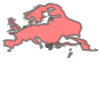

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [10]:
##Access the relevant shapefiles for the species
dist_shp_spec = dist_shp[dist_shp["binomial"]== "Capreolus capreolus"]
poly_spec = dist_shp_spec[["geometry"]]
##merge the polygons
iucn_poly_spec= poly_spec.unary_union
Q3 = iucn_poly_spec.simplify(0.3)
iucn_poly_spec
Q3
print(type(Q3))

In [11]:
condition_list=[]
for point in data["coordinates"]:
    output= Q3.contains(point)
    condition_list.append(output)


In [12]:
data["in_dist_polygon"]=condition_list
data
data2=data[data.in_dist_polygon == True]
data2

Unnamed: 0  occurrence_id     gbif_id occurrence_type  \
0               16         833269  1238712461             NaN   
1               17         833270  1238712545             NaN   
2               28         833281  1238712863             NaN   
3               36         833289  1238712919             NaN   
4               38         833291  1238712948             NaN   
5               40         833293  1238712957             NaN   
6               45         833298  1238712970             NaN   
7               47         833300  1238712973             NaN   
8               60         833313  1238713078             NaN   
9               68         833321  1238713128             NaN   
10              74         833327  1238713150             NaN   
11              89         833342  1238713204             NaN   
12             109         833362  1238713280             NaN   
13             123         833376  1238713329             NaN   
14             158         833411  1238713456             NaN   
15             161         833414  1238713497             NaN   
16             164         833417  1238713518             NaN   
17             165         833418  1238713519             NaN   
18             166         833419  1238713524             NaN   
19             168         833421  1238713538             NaN   
20             169         833422  1238713540             NaN   
21             174         833427  1238713563             NaN   
22             175         833428  1238713574             NaN   
23             177         833430  1238713591             NaN   
24             178         833431  1238713592             NaN   
25             179         833432  1238713593             NaN   
26             182         833435  1238713598             NaN   
27             185         833438  1238713601             NaN   
28             186         833439  1238713604             NaN   
29             188         833441  1238713607             NaN   
...            ...            ...         ...             ...   
262474      785494        1618747  1668737394             NaN   
262475      785495        1618748  1668737409             NaN   
262476      785496        1618749  1668737424             NaN   
262477      785497        1618750  1668737461             NaN   
262478      785498        1618751  1668737490             NaN   
262479      785499        1618752  1668737501             NaN   
262480      785500        1618753  1668737502             NaN   
262481      785501        1618754  1668737505             NaN   
262482      785502        1618755  1668737517             NaN   
262483      785503        1618756  1668737519             NaN   
262484      785504        1618757  1668737530             NaN   
262485      785505        1618758  1668737546             NaN   
262486      785506        1618759  1668737553             NaN   
262487      785508        1618761  1668737564             NaN   
262488      785509        1618762  1668737568             NaN   
262489      785510        1618763  1668737571             NaN   
262490      785511        1618764  1668737574             NaN   
262491      785512        1618765  1668737588             NaN   
262492      785513        1618766  1668737593             NaN   
262493      785514        1618767  1668737596             NaN   
262494      785515        1618768  1668737599             NaN   
262495      785516        1618769  1668737607             NaN   
262496      785517        1618770  1668737645             NaN   
262497      785518        1618771  1668737649             NaN   
262498      785519        1618772  1668737662             NaN   
262499      785520        1618773  1668737663             NaN   
262500      785521        1618774  1668737665             NaN   
262501      785522        1618775  1668737670             NaN   
262502      785523        1618776  1668737672             NaN   
262503      785524        1618777  16687376

Unnamed: 0  occurrence_id     gbif_id occurrence_type  \
1               17         833270  1238712545             NaN   
2               28         833281  1238712863             NaN   
7               47         833300  1238712973             NaN   
10              74         833327  1238713150             NaN   
11              89         833342  1238713204             NaN   
12             109         833362  1238713280             NaN   
13             123         833376  1238713329             NaN   
15             161         833414  1238713497             NaN   
16             164         833417  1238713518             NaN   
18             166         833419  1238713524             NaN   
19             168         833421  1238713538             NaN   
21             174         833427  1238713563             NaN   
22             175         833428  1238713574             NaN   
24             178         833431  1238713592             NaN   
26             182         833435  1238713598             NaN   
29             188         833441  1238713607             NaN   
30             190         833443  1238713613             NaN   
31             192         833445  1238713615             NaN   
35             202         833455  1238713643             NaN   
36             206         833459  1238713660             NaN   
37             207         833460  1238713662             NaN   
38             213         833466  1238713683             NaN   
41             217         833470  1238713696             NaN   
42             219         833472  1238713719             NaN   
44             222         833475  1238713728             NaN   
49             252         833505  1238713821             NaN   
50             253         833506  1238713823             NaN   
59             292         833545  1238713961             NaN   
60             295         833548  1238713982             NaN   
63             324         833577  1238714131             NaN   
...            ...            ...         ...             ...   
262474      785494        1618747  1668737394             NaN   
262475      785495        1618748  1668737409             NaN   
262476      785496        1618749  1668737424             NaN   
262477      785497        1618750  1668737461             NaN   
262478      785498        1618751  1668737490             NaN   
262479      785499        1618752  1668737501             NaN   
262480      785500        1618753  1668737502             NaN   
262481      785501        1618754  1668737505             NaN   
262482      785502        1618755  1668737517             NaN   
262483      785503        1618756  1668737519             NaN   
262484      785504        1618757  1668737530             NaN   
262485      785505        1618758  1668737546             NaN   
262486      785506        1618759  1668737553             NaN   
262487      785508        1618761  1668737564             NaN   
262488      785509        1618762  1668737568             NaN   
262489      785510        1618763  1668737571             NaN   
262490      785511        1618764  1668737574             NaN   
262491      785512        1618765  1668737588             NaN   
262492      785513        1618766  1668737593             NaN   
262493      785514        1618767  1668737596             NaN   
262494      785515        1618768  1668737599             NaN   
262495      785516        1618769  1668737607             NaN   
262496      785517        1618770  1668737645             NaN   
262497      785518        1618771  1668737649             NaN   
262498      785519        1618772  1668737662             NaN   
262499      785520        1618773  1668737663             NaN   
262500      785521        1618774  1668737665             NaN   
262501      785522        1618775  1668737670             NaN   
262502      785523        1618776  1668737672             NaN   
262503      785524        1618777  16687376

In [15]:
#set date column to datetime format and extract year
data2['event_date'] = pd.to_datetime(data2['event_date'])
data2['year'] = data2['event_date'].dt.year

#only include observations >1800
data3=data2[data2.year >= 1800]
print(len(data3.index))
#save to csv
for spec in species:
    data=data3.loc[data3['species'] == spec]
    spec=spec.replace(" ","_")
    data.to_csv(file_dir+'/data/SQL_raw_gbif/%s_raw_data.csv'%spec)

C:\Users\M-RAM\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\M-RAM\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


215645


In [16]:
df=pd.read_csv(file_dir+'/data/SQL_raw_gbif/Capreolus_capreolus_raw_data.csv')
df

C:\Users\M-RAM\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  Unnamed: 0.1  occurrence_id     gbif_id occurrence_type  \
0                1            17         833270  1238712545             NaN   
1                2            28         833281  1238712863             NaN   
2                7            47         833300  1238712973             NaN   
3               10            74         833327  1238713150             NaN   
4               11            89         833342  1238713204             NaN   
5               12           109         833362  1238713280             NaN   
6               13           123         833376  1238713329             NaN   
7               15           161         833414  1238713497             NaN   
8               16           164         833417  1238713518             NaN   
9               18           166         833419  1238713524             NaN   
10              19           168         833421  1238713538             NaN   
11              21           174         833427  1238713563             NaN   
12              22           175         833428  1238713574             NaN   
13              24           178         833431  1238713592             NaN   
14              26           182         833435  1238713598             NaN   
15              29           188         833441  1238713607             NaN   
16              30           190         833443  1238713613             NaN   
17              31           192         833445  1238713615             NaN   
18              35           202         833455  1238713643             NaN   
19              36           206         833459  1238713660             NaN   
20              37           207         833460  1238713662             NaN   
21              38           213         833466  1238713683             NaN   
22              41           217         833470  1238713696             NaN   
23              42           219         833472  1238713719             NaN   
24              44           222         833475  1238713728             NaN   
25              49           252         833505  1238713821             NaN   
26              50           253         833506  1238713823             NaN   
27              59           292         833545  1238713961             NaN   
28              60           295         833548  1238713982             NaN   
29              63           324         833577  1238714131             NaN   
...            ...           ...            ...         ...             ...   
215615      262474        785494        1618747  1668737394             NaN   
215616      262475        785495        1618748  1668737409             NaN   
215617      262476        785496        1618749  1668737424             NaN   
215618      262477        785497        1618750  1668737461             NaN   
215619      262478        785498        1618751  1668737490             NaN   
215620      262479        785499        1618752  1668737501             NaN   
215621      262480        785500        1618753  1668737502             NaN   
215622      262481        785501        1618754  1668737505             NaN   
215623      262482        785502        1618755  1668737517             NaN   
215624      262483        785503        1618756  1668737519             NaN   
215625      262484        785504        1618757  1668737530             NaN   
215626      262485        785505        1618758  1668737546             NaN   
215627      262486        785506        1618759  1668737553             NaN   
215628      262487        785508        1618761  1668737564             NaN   
215629      262488        785509        1618762  1668737568             NaN   
215630      262489        785510        1618763  1668737571             NaN   
215631      262490        785511        1618764  1668737574             NaN   
215632      262491        785512        1618765  1668737588             NaN   
215633      262492        785513        1618766  166873759